### **Telco Customer Churn**

![alt text](<ai customer service predictions (3).webp>)

by TSR

### **Data Preparation**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.TotalCharges.dtype

dtype('float64')

In [8]:
df.TotalCharges.isnull().sum()

11

In [9]:
df.shape

(7043, 21)

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
print(df.shape)

print(df.isnull().sum())

(7032, 21)
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
df1 = df.drop(['customerID'], axis=1)

In [13]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
713,Female,0,No,Yes,14,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,86.00,1164.05,No
4656,Female,0,Yes,Yes,22,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.80,1615.10,No
3344,Male,0,No,No,10,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.15,811.80,Yes
1367,Male,1,Yes,No,61,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,82.15,4904.85,No
3204,Male,0,No,Yes,40,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.40,854.90,No


In [15]:
def col_data(df):
    for col in df:
        print(f"{col}: {df[col].unique()}")

col_data(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [16]:
df1.replace({'No phone service':'No', 'No internet service':'No'}, inplace=True)

In [17]:
col_data(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [18]:
df1[df1.InternetService=='No'].value_counts().shape

(1506,)

In [19]:
df1['gender'].replace({'Male':1, 'Female':0}, inplace=True)

In [20]:
columns_to_replace = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'
]

replacement_mapping = {'Yes': 1, 'No': 0}

df1[columns_to_replace] = df1[columns_to_replace].replace(replacement_mapping)

In [21]:
col_data(df1)

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [22]:
df2 = pd.get_dummies(df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [23]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4874,0,0,0,0,38,1,0,1,1,1,...,0,1,0,1,0,0,0,1,0,0
2241,0,0,1,1,56,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2401,1,1,0,1,11,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4786,1,0,0,0,72,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4356,0,0,0,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df2[['tenure', 'MonthlyCharges', 'TotalCharges']])

df2[['tenure', 'MonthlyCharges', 'TotalCharges']].sample(5)

,tenure,MonthlyCharges,TotalCharges
1957,0.633803,0.346766,0.281676
2605,0.169014,0.021393,0.027983
2339,0.281690,0.756219,0.225589
2160,1.000000,0.651244,0.701373
5006,0.197183,0.372637,0.101662


In [25]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### **Exploratory Data Analysis**

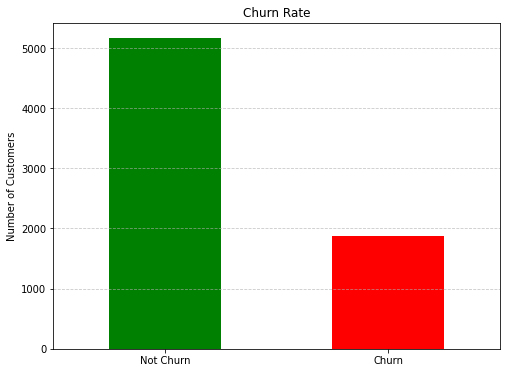

In [27]:
y_churn = (df1['Churn']).value_counts()[0]
n_churn = (df1['Churn']).value_counts()[1]

churn = pd.Series([y_churn, n_churn], index=['Not Churn', 'Churn'])

churn.plot(kind='bar', color=['green', 'red'], figsize=(8, 6))
plt.title('Churn Rate')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

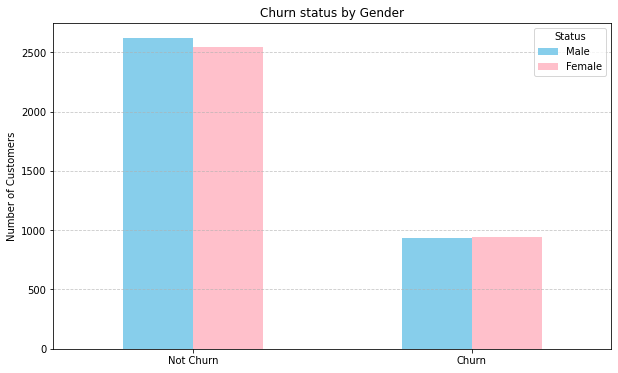

In [28]:
churn_Gender = df1[df1['gender'] == 1]['Churn'].value_counts()
nChurn_Gender = df1[df1['gender'] == 0]['Churn'].value_counts()

churnGender = pd.DataFrame({
    'Male': churn_Gender,
    'Female': nChurn_Gender
})

churnGender.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'pink'])
plt.title('Churn status by Gender')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Status')
plt.show()

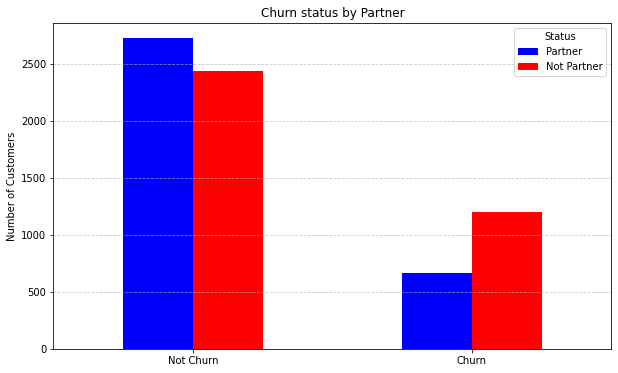

In [29]:
churn_Partner = df1[df1['Partner'] == 1]['Churn'].value_counts()
churn_notPartner = df1[df1['Partner'] == 0]['Churn'].value_counts()

churnPartner = pd.DataFrame({
    'Partner': churn_Partner,
    'Not Partner': churn_notPartner
})

churnPartner.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])
plt.title('Churn status by Partner')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Status')
plt.show()

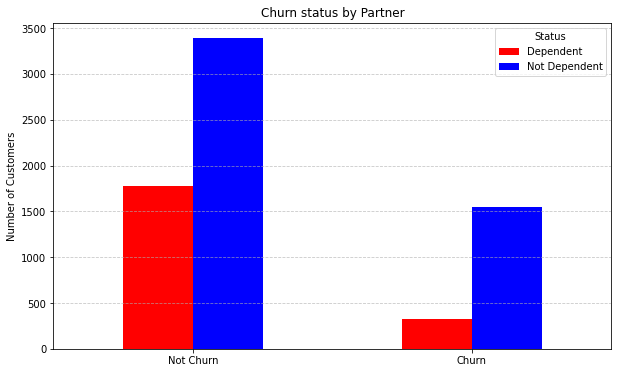

In [30]:
churn_Dependents = df1[df1['Dependents'] == 1]['Churn'].value_counts()
churn_notDependents = df1[df1['Dependents'] == 0]['Churn'].value_counts()

churnDependents = pd.DataFrame({
    'Dependent': churn_Dependents,
    'Not Dependent': churn_notDependents
})

churnDependents.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])
plt.title('Churn status by Partner')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0,1], labels=['Not Churn', 'Churn'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Status')
plt.show()

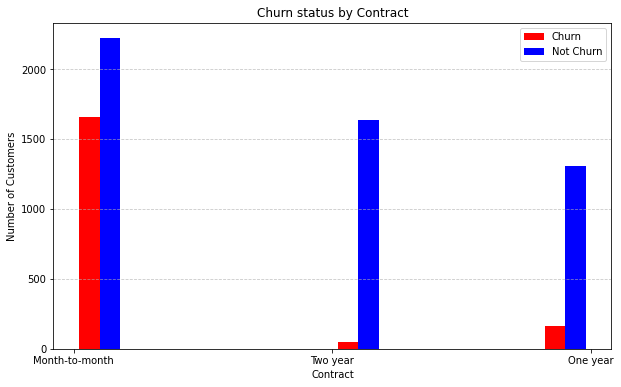

In [31]:
yChurn_contract = df1[df1['Churn'] == 1]['Contract']
nChurn_contract = df1[df1['Churn'] == 0]['Contract']

plt.figure(figsize=(10, 6))
plt.hist([yChurn_contract, nChurn_contract], color=['red', 'blue'], label=['Churn', 'Not Churn'])
plt.title('Churn status by Contract')
plt.xlabel('Contract')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

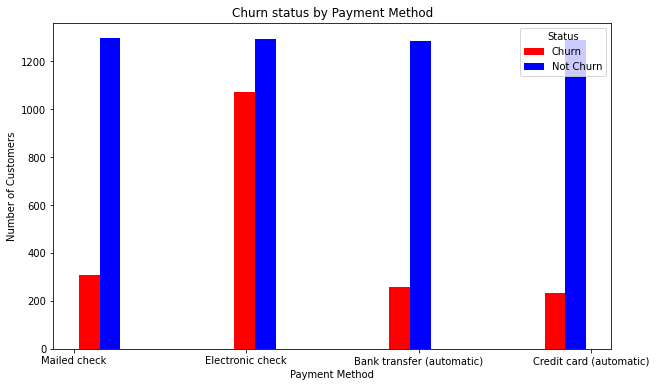

In [32]:
yChurn_paymentM = df1[df1['Churn'] == 1]['PaymentMethod']
nChurn_paymentM = df1[df1['Churn'] == 0]['PaymentMethod']

plt.figure(figsize=(10, 6))
plt.hist([yChurn_paymentM, nChurn_paymentM], color=['red', 'blue'], label=['Churn', 'Not Churn'])
plt.title('Churn status by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.legend(title='Status', loc='upper right')
plt.show()

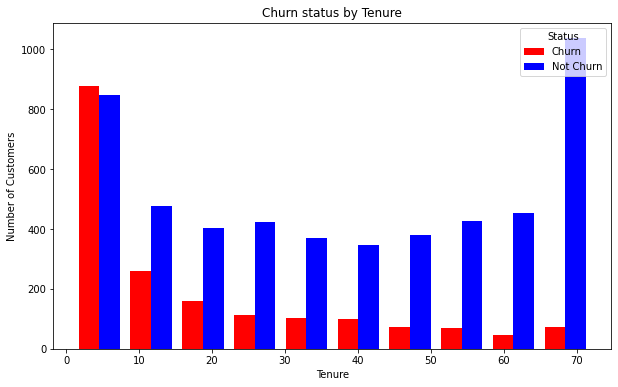

In [33]:
yChurn_tenure = df1[df1['Churn'] == 1]['tenure']
nChur_tenure = df1[df1['Churn'] == 0]['tenure']

plt.figure(figsize=(10, 6))
plt.hist([yChurn_tenure, nChur_tenure], color=['red', 'blue'], label=['Churn', 'Not Churn'])
plt.title('Churn status by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend(title='Status', loc='upper right')
plt.show()

### **Customer Segmentation**

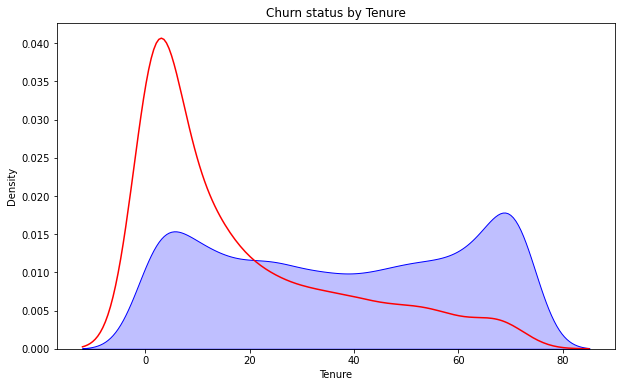

In [34]:
yChurn_tenure = df1[df1['Churn'] == 1]['tenure']
nChur_tenure = df1[df1['Churn'] == 0]['tenure']

plt.figure(figsize=(10, 6))
sns.kdeplot(yChurn_tenure, label='Churn', color='red', shade=False)
sns.kdeplot(nChur_tenure, label='Not Churn', color='blue', shade=True)
plt.title('Churn status by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()

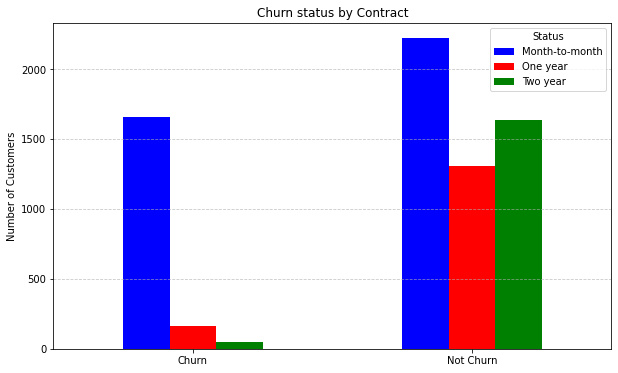

In [35]:
yChurn_contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
nChurn_contract = df1[df1['Churn'] == 0]['Contract'].value_counts()

churn_contract = pd.DataFrame({
    'Churn': yChurn_contract,
    'Not Churn': nChurn_contract
})

churn_contract.T.plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'green'])
plt.title('Churn status by Contract')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Status', labels=['Month-to-month', 'One year', 'Two year'])
plt.show()

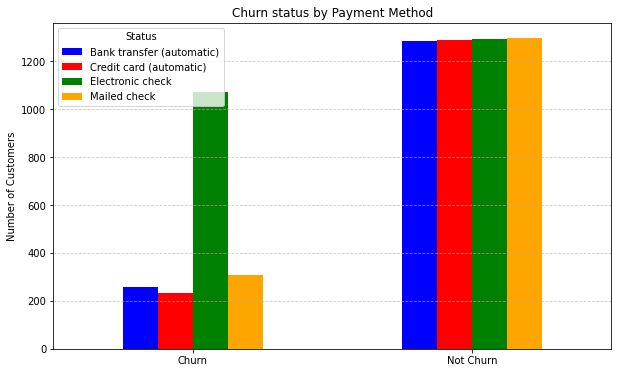

In [36]:
yChurn_paymentM = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
nChurn_paymentM = df1[df1['Churn'] == 0]['PaymentMethod'].value_counts()

churn_payment = pd.DataFrame({
    'Churn': yChurn_paymentM,
    'Not Churn': nChurn_paymentM
})

churn_payment.T.plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'green', 'orange'])
plt.title('Churn status by Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Status', labels=['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'])
plt.show()

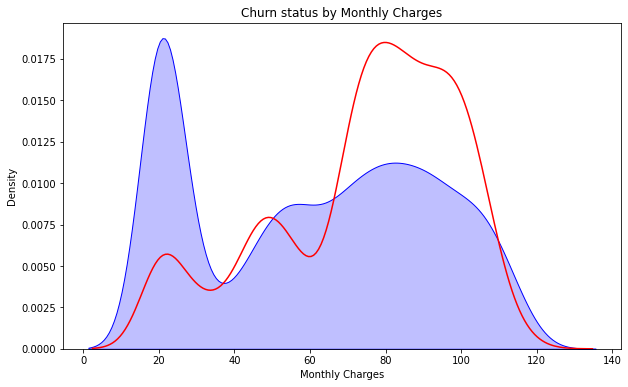

In [37]:
churn_monthlyCharges = df1[df1['Churn'] == 1]['MonthlyCharges']
not_churn_monthlyCharges = df1[df1['Churn'] == 0]['MonthlyCharges']

plt.figure(figsize=(10, 6))
sns.kdeplot(churn_monthlyCharges, label='Churn', color='red', shade=False)
sns.kdeplot(not_churn_monthlyCharges, label='Not Churn', color='blue', shade=True)
plt.title('Churn status by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

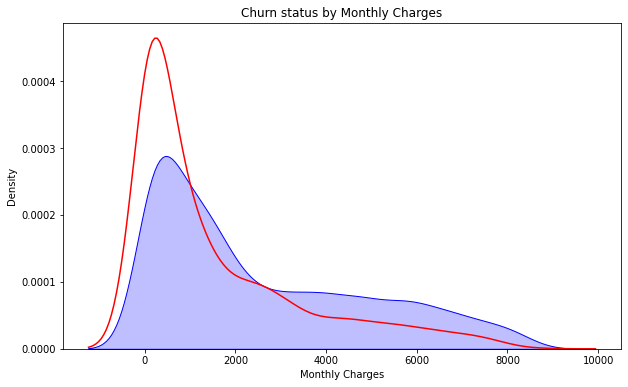

In [38]:
churn_totalCharges = df1[df1['Churn'] == 1]['TotalCharges']
not_churn_totalCharges = df1[df1['Churn'] == 0]['TotalCharges']

plt.figure(figsize=(10, 6))
sns.kdeplot(churn_totalCharges, label='Churn', color='red', shade=False)
sns.kdeplot(not_churn_totalCharges, label='Not Churn', color='blue', shade=True)
plt.title('Churn status by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

### **Churn Prediction Model**

In [39]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2460,0,0,1,1,0.661972,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2964,1,0,1,0,0.323944,1,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4843,1,0,1,1,0.957746,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
5576,0,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
522,1,0,1,1,0.760563,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [40]:
x = df2.drop('Churn', axis=1)
y = df2['Churn']

In [41]:
x[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [42]:
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
x_train.shape

(5625, 26)

In [45]:
x_test.shape

(1407, 26)

In [46]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_dim=26, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc'])

In [47]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5441 - acc: 0.7241 - val_loss: 0.4712 - val_acc: 0.7804
Epoch 2/100
176/176 [==============================] - 0s 783us/step - loss: 0.4662 - acc: 0.7717 - val_loss: 0.4498 - val_acc: 0.7804
Epoch 3/100
176/176 [==============================] - 0s 786us/step - loss: 0.4505 - acc: 0.7831 - val_loss: 0.4450 - val_acc: 0.7832
Epoch 4/100
176/176 [==============================] - 0s 763us/step - loss: 0.4402 - acc: 0.7931 - val_loss: 0.4429 - val_acc: 0.7832
Epoch 5/100
176/176 [==============================] - 0s 756us/step - loss: 0.4400 - acc: 0.7870 - val_loss: 0.4404 - val_acc: 0.7839
Epoch 6/100
176/176 [==============================] - 0s 813us/step - loss: 0.4419 - acc: 0.7876 - val_loss: 0.4396 - val_acc: 0.7846
Epoch 7/100
176/176 [==============================] - 0s 815us/step - loss: 0.4356 - acc: 0.7941 - val_loss: 0.4384 - val_acc: 0.7854
Epoch 8/100
176/176 [==============================] - 0s

In [48]:
print(f"Train accuary: {history.history['acc'][-1]:.2f}")
print(f"Validation accuary: {history.history['val_acc'][-1]:.2f}")

Train accuary: 0.81
Validation accuary: 0.78


### **Model Evaluation and Interpretation**

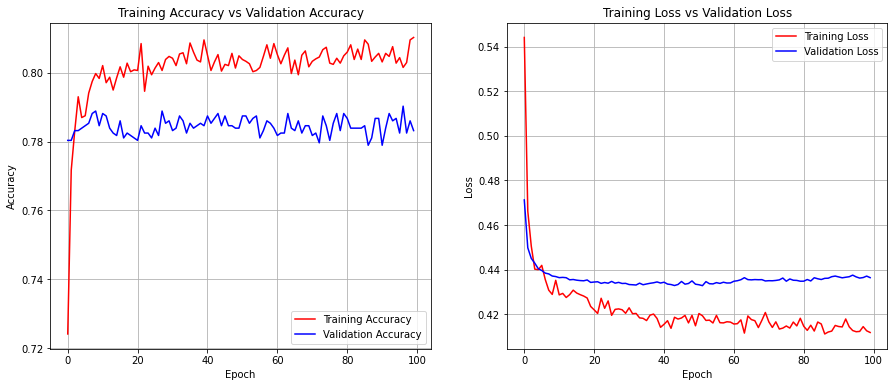

In [49]:
tr_acc = history.history['acc']
val_acc = history.history['val_acc']

tr_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(tr_acc, color='r', linestyle='-', label='Training Accuracy')
plt.plot(val_acc, color='b', linestyle='-', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()


plt.subplot(1,2,2)
plt.plot(tr_loss, color='r', linestyle='-', label='Training Loss')
plt.plot(val_loss, color='b', linestyle='-', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()


plt.show()

In [50]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [51]:
y_pred = model.predict(x_test)

In [52]:
y_pred[:5]

array([[0.00441981],
       [0.11394019],
       [0.6294584 ],
       [0.12078425],
       [0.29162702]], dtype=float32)

Text(69.0, 0.5, 'Actual')

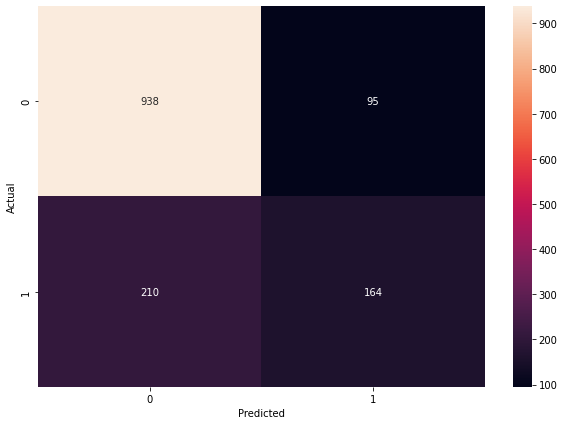

In [67]:
y_pred_binary = (y_pred > 0.5).astype(int)

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_binary)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [55]:
print("Accuracy by heatmap: ", round((947+154)/(947+86+220+154), 2))

Accuracy by heatmap:  0.78


In [66]:
print(f"Not churn: {(947/(947+220))*100:.2f}%")

Not churn: 81.15%


In [65]:
print(f"Churned: {(154/(154+86))*100:.2f}%")

Churned: 64.17%


### **Business Recommendations**

1. **Improve Customer Service**:

- Focus on providing excellent customer service, especially for customers with month-to-month contracts, as they are more likely to churn.
- Implement a customer feedback system to identify and address issues promptly.

2. **Offer Incentives**:

- Provide incentives for customers to switch to longer-term contracts (one year or two years) to increase customer retention.
- Offer discounts or promotions for customers who have been with the company for a longer tenure. 

3. **Targeted Marketing**:

- Use targeted marketing campaigns to reach out to customers who are more likely to churn, such as those with higher monthly charges or those using electronic checks as a payment method.
- Personalize offers and communication based on customer data to increase engagement.

4. **Enhance Product Offerings**:

- Improve the quality and variety of services offered, especially internet services, as customers with no internet service are less likely to churn.
- Introduce new features or bundles that add value to the existing services.

5. **Customer Education**:

- Educate customers on how to make the most of your services, which can increase satisfaction and reduce churn.
- Provide easy-to-access resources and support for customers to resolve any issues they may face.